In [66]:
# Import packages
import numpy as np
import pandas as pd

from sklearn.preprocessing import StandardScaler # standard score aka z score
from sklearn.preprocessing import LabelEncoder #Encode target labels with value between 0 and n_classes-1.
from sklearn.preprocessing import LabelBinarizer
# returns vector when there are two classes, likely means have to reduce dimension first then use....
#https://www.youtube.com/watch?v=63IN-qnI2YI
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import copy

In [67]:
df1 = pd.read_csv('resale-flat-prices-based-on-approval-date-1990-1999.csv')

In [68]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,9000
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,31.0,IMPROVED,1977,6000
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,31.0,IMPROVED,1977,8000
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,31.0,IMPROVED,1977,6000
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,73.0,NEW GENERATION,1976,47200
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,142.0,APARTMENT,1987,456000
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,142.0,APARTMENT,1988,408000
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,146.0,MAISONETTE,1988,469000
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,146.0,MAISONETTE,1988,440000


In [69]:
df1_original = copy.deepcopy(df1)

In [70]:
#df2 = pd.read_csv('resale-flat-prices-based-on-registration-date-from-mar-2012-to-dec-2017.csv')

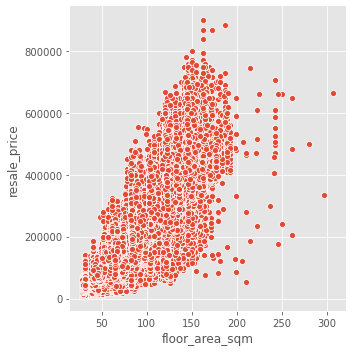

In [71]:
sns.relplot(data=df1,x="floor_area_sqm", y="resale_price")

In [72]:
from sklearn.cluster import KMeans

In [73]:
# for i in range (10,20):
#     for k in range (1, 10):
#         modelx = KMeans(n_clusters = i, random_state = k)
#         dfx = df1.loc[:,['floor_area_sqm','resale_price']]
#         print(modelx.fit(dfx))
#         print(modelx.inertia_)

In [74]:
# modelx = KMeans(n_clusters = 100, random_state = 0)
# dfx = df1.loc[:,['floor_area_sqm','resale_price']]
# print(modelx.fit(dfx))
# print(modelx.inertia_)

In [75]:
# Import packages
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer

In [76]:
# Check the data types
df1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
dtype: object

In [77]:
labelencoder = LabelEncoder()
df1['variety_encoded'] = labelencoder.fit_transform(df1['flat_type'])
df1.dtypes

month                   object
town                    object
flat_type               object
block                   object
street_name             object
storey_range            object
floor_area_sqm         float64
flat_model              object
lease_commence_date      int64
resale_price             int64
variety_encoded          int32
dtype: object

In [78]:
df1['variety_encoded'].unique()

array([0, 2, 3, 4, 1, 5, 6])

In [79]:
#https://www.youtube.com/watch?v=v_4KWmkwmsU
labelbinarizer = LabelBinarizer()
x = labelbinarizer.fit_transform(df1["flat_type"])
encoded_df = pd.DataFrame(x, columns=labelbinarizer.classes_)
encoded_df.head()

,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


In [80]:
df1 = pd.concat([df1, encoded_df], axis=1)
df1.sample(10)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,variety_encoded,1 ROOM,2 ROOM,3 ROOM,4 ROOM,5 ROOM,EXECUTIVE,MULTI GENERATION
102223,1995-09,YISHUN,4 ROOM,260,YISHUN ST 22,01 TO 03,84.0,SIMPLIFIED,1985,161000,3,0,0,0,1,0,0,0
184680,1998-02,YISHUN,5 ROOM,788,YISHUN AVE 2,04 TO 06,121.0,IMPROVED,1987,400000,4,0,0,0,0,1,0,0
246978,1999-04,BUKIT PANJANG,5 ROOM,273,BANGKIT RD,07 TO 09,122.0,IMPROVED,1988,285000,4,0,0,0,0,1,0,0
210333,1998-09,CENTRAL AREA,3 ROOM,635,VEERASAMY RD,13 TO 15,72.0,MODEL A,1985,180000,2,0,0,1,0,0,0,0
90037,1995-04,BEDOK,EXECUTIVE,725,BEDOK RESERVOIR RD,04 TO 06,151.0,MAISONETTE,1984,420000,5,0,0,0,0,0,1,0
10733,1990-11,BUKIT MERAH,2 ROOM,34,JLN BT HO SWEE,07 TO 09,51.0,STANDARD,1971,21000,1,0,1,0,0,0,0,0
118700,1996-03,HOUGANG,5 ROOM,439,HOUGANG AVE 8,13 TO 15,121.0,IMPROVED,1990,370000,4,0,0,0,0,1,0,0
47849,1993-07,TOA PAYOH,3 ROOM,110,LOR 1 TOA PAYOH,04 TO 06,65.0,IMPROVED,1967,69000,2,0,0,1,0,0,0,0
149400,1997-02,BEDOK,4 ROOM,43,CHAI CHEE ST,01 TO 03,92.0,NEW GENERATION,1980,308000,3,0,0,0,1,0,0,0
112601,1996-01,BUKIT MERAH,3 ROOM,72,REDHILL RD,10 TO 12,54.0,STANDARD,1969,111000,2,0,0,1,0,0,0,0


In [81]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()

In [82]:
df1 = df1_original
df1.loc[:,['floor_area_sqm','resale_price']]


,floor_area_sqm,resale_price
0,31.0,9000
1,31.0,6000
2,31.0,8000
3,31.0,6000
4,73.0,47200
...,...,...
287195,142.0,456000
287196,142.0,408000
287197,146.0,469000
287198,146.0,440000


In [83]:
df1.loc[:,['floor_area_sqm','resale_price']] = standardScaler.fit_transform(df1.loc[:,['floor_area_sqm','resale_price']])

In [84]:
df1

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,-2.278778,IMPROVED,1977,-1.643008
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,-2.278778,IMPROVED,1977,-1.666419
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,-2.278778,IMPROVED,1977,-1.650811
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,-2.278778,IMPROVED,1977,-1.666419
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,-0.743790,NEW GENERATION,1976,-1.344906
...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,1.777974,APARTMENT,1987,1.845251
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,1.777974,APARTMENT,1988,1.470673
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,1.924164,MAISONETTE,1988,1.946699
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,1.924164,MAISONETTE,1988,1.720392


In [85]:
# import library
from sklearn.decomposition import PCA

In [86]:
# initialise PCA with 2 principle components
pca = PCA(n_components = 2)

In [87]:
# drop all rows with null values, PCA cannot be done on null values
df1 = df1.dropna()
df1 = df1.reset_index(drop=True)

In [88]:
# apply PCA for column index 0 to 3
pca_components = pca.fit_transform(df1.loc[:,['floor_area_sqm','resale_price']])

In [91]:
pca_df = pd.DataFrame(pca_components, columns=["principal component 1", "principal component 2"])

In [92]:
pca_df.head(5)

,principal component 1,principal component 2
0,-2.773121,-0.449557
1,-2.789675,-0.433003
2,-2.778639,-0.444039
3,-2.789675,-0.433003
4,-1.476931,0.425053


In [93]:
main_df = pd.concat([df1, pca_df], axis=1)

In [102]:
main_df

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,principal component 1,principal component 2
0,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,-2.278778,IMPROVED,1977,-1.643008,-2.773121,-0.449557
1,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,04 TO 06,-2.278778,IMPROVED,1977,-1.666419,-2.789675,-0.433003
2,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,10 TO 12,-2.278778,IMPROVED,1977,-1.650811,-2.778639,-0.444039
3,1990-01,ANG MO KIO,1 ROOM,309,ANG MO KIO AVE 1,07 TO 09,-2.278778,IMPROVED,1977,-1.666419,-2.789675,-0.433003
4,1990-01,ANG MO KIO,3 ROOM,216,ANG MO KIO AVE 1,04 TO 06,-0.743790,NEW GENERATION,1976,-1.344906,-1.476931,0.425053
...,...,...,...,...,...,...,...,...,...,...,...,...
287195,1999-12,YISHUN,EXECUTIVE,611,YISHUN ST 61,10 TO 12,1.777974,APARTMENT,1987,1.845251,2.562007,-0.047572
287196,1999-12,YISHUN,EXECUTIVE,324,YISHUN CTRL,01 TO 03,1.777974,APARTMENT,1988,1.470673,2.297140,0.217295
287197,1999-12,YISHUN,EXECUTIVE,392,YISHUN AVE 6,07 TO 09,1.924164,MAISONETTE,1988,1.946699,2.737113,-0.015935
287198,1999-12,YISHUN,EXECUTIVE,356,YISHUN RING RD,04 TO 06,1.924164,MAISONETTE,1988,1.720392,2.577090,0.144088


In [95]:
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [0.89850399 0.10149601]


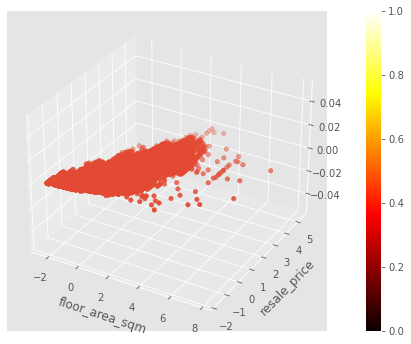

In [96]:
# original features without PCA applied
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(322, projection='3d')

img = ax.scatter(main_df["floor_area_sqm"], main_df["resale_price"], cmap=plt.hot())
ax.set_xlabel("floor_area_sqm")
ax.set_ylabel("resale_price")
cbar = fig.colorbar(img)
plt.show()

KeyError: 'EXECUTIVE'

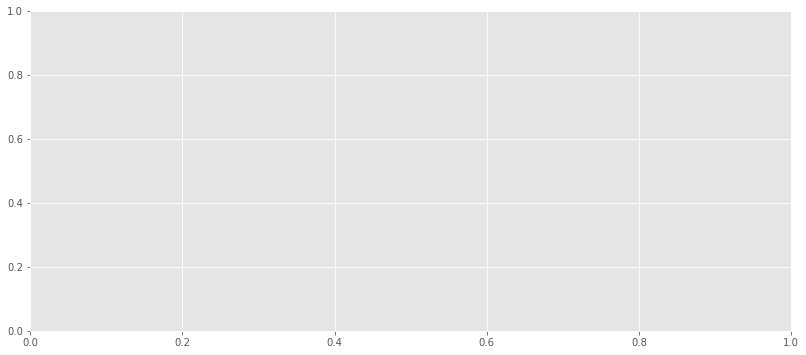

In [101]:
# after PCA is applied
import matplotlib.patches as mpatches

fig = plt.figure()
fig.set_size_inches(30, 20)
ax = fig.add_subplot(322)
colors = {'1 ROOM':'red', '2 ROOM':'blue', '3 ROOM':'green', '4 ROOM':'yellow', '5 ROOM':'black', 'EXECUTIVE ':'cyan', 'MULTI GENERATION':'white'}

img = ax.scatter(main_df["principal component 1"], main_df["principal component 2"], c=main_df["flat_type"].apply(lambda x: colors[x]))
ax.set_xlabel("principal component 1")
ax.set_ylabel("principal component 2")

red_patch = mpatches.Patch(color='red', label='1 ROOM')
blue_patch = mpatches.Patch(color='blue', label='2 ROOM')
green_patch = mpatches.Patch(color='green', label='3 ROOM')
yellow_patch = mpatches.Patch(color='yellow', label='4 ROOM')
black_patch = mpatches.Patch(color='black', label='5 ROOM')
cyan_patch = mpatches.Patch(color='cyan', label='EXECUTIVE')
white_patch = mpatches.Patch(color='white', label='MULTI GENERATION')


plt.legend(handles=[red_patch, blue_patch, green_patch, yellow_patch,black_patch,cyan_patch,white_patch])
plt.show()